# Exploratory Data Analysis

### Wat is EDA?  

EDA is een stap in het gegevensanalyseproces, waarbij een aantal technieken worden gebruikt om de gebruikte gegevensset beter te begrijpen.
'De dataset begrijpen' kan verwijzen naar een aantal dingen, waaronder maar niet beperkt tot...
* belangrijke variabelen extraheren 
* nutteloze variabelen achterlaten
* outliers, ontbrekende waarden of menselijke fouten identificeren
* relatie(s), of het gebrek daaraan, tussen variabelen begrijpen

Uiteindelijk, het maximaliseren van uw inzichten in een dataset en het minimaliseren van mogelijke fouten die later in het proces kunnen optreden.  

### Waarom EDA?

Heb je ooit gehoord van de uitdrukking "garbage in, garbage out"?
Met EDA is het meer zoiets als "garbage in, uitvoeren van EDA, mogelijk garbage out."
Door EDA uit te voeren, kun je van een bijna bruikbare dataset een volledig bruikbare dataset maken. 
 

## Variabelen begrijpen

Aan de hand van enkele voorbeelden leggen we uit wat we hieronder verstaan. 
<p>&nbsp;</p>

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets
data =datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

Met de head methode kunnen we snel de eerste rijen van een dataframe bekijken. Een dataframe kan je bezien als equivalent aan een databank tabel maar dan in memory. 
<p>&nbsp;</p>

We hebben ook nog de volgende eerste lijn hulp methodes om onze data beter te leren kennen.

.shape geeft het aantal rijen terug en het aantal kolommen
.columns naam van alle kolommen

In [2]:
df.shape

(506, 13)

In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Nu we ongeveer een zicht krijgen op het aantal kolomen en rijen kunnen we verder de data zelf gaan bekijken.

.nunique(axis=0) retourneert het aantal unieke waarden voor elke variabele.  

.describe() geeft een samenvatting van het aantal, het gemiddelde, de standaarddeviatie, min en max voor numerieke variabelen. 




In [4]:
df.nunique(axis=0)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [5]:
# apply code is enkel voor formattering van het resultaat
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [6]:
df.RAD.unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

## Dataset opschonen

Nu we een een eerste keer naar onze data hebben gekeken kunnen we data beginnen cleanen

Niet relevante kolommen verwijderen
<p>&nbsp;</p>

In [7]:
df = df.copy().drop(['ZN'], axis=1)

Eventueel kolommen met teveel missing values verwijderen
<p>&nbsp;</p>

In [8]:
NA_val = df.isna().sum()
NA_val

CRIM       0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Hier een voorbeeld van een transformatie die kolomen gaat verwijderen waar de missing values boven een bepaalt percentage zitten. Als er zeer weinig missing values zijn is het soms beter om missing values in te vullen met bijvoorbeeld de gemiddelde waarde van al de andere waardes omdat een kolom verwijderen tot informatie verlies kan leiden. 

In [9]:
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df = df[na_filter(NA_val)]
df.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Aangezien we geen missing values hebben blijven alle kolommen hier behouden. 

Dataset bevatten ook soms input fouten of outliers die we willen verwijderen.

In [10]:
df = df[df['AGE'].between(18, 75)]
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

CRIM       INDUS        CHAS         NOX          RM         AGE  \
count  217.000000  217.000000  217.000000  217.000000  217.000000  217.000000   
mean     0.601116    6.688848    0.050691    0.475648    6.402037   47.441935   
std      1.975536    4.643262    0.219874    0.058566    0.604022   16.571513   
min      0.006320    0.460000    0.000000    0.385000    4.973000   18.400000   
25%      0.044170    3.410000    0.000000    0.433000    5.927000   33.100000   
50%      0.081990    5.320000    0.000000    0.458000    6.312000   47.200000   
75%      0.188360    8.140000    0.000000    0.515000    6.728000   61.800000   
max     15.575700   25.650000    1.000000    0.655000    8.337000   75.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  
count  217.000000  217.000000  217.000000  217.000000  217.000000  217.000000  
mean     5.109055    5.691244  320.110599   17.941014  384.657834    8.848986  
std      1.989007    5.267965  110.757479    1.908030   42.826531    3.748327  
min      1.986500    1.000000  187.000000   12.600000    3.650000    2.470000  
25%      3.554900    4.000000  254.000000   16.600000  388.650000    6.050000  
50%      4.779400    4.000000  289.000000   18.300000  393.370000    8.440000  
75%      6.458400    5.000000  345.000000   19.200000  396.900000   11.410000  
max     12.126500   24.000000  666.000000   22.000000  396.900000   21.140000

Rijen met null waardes kunnen we best ook verwijderen

In [11]:
df = df.dropna(axis=0)

In [12]:
df.shape

(217, 12)

## Data relatie

We gaan kijken of er correlaties zijn de verschillende eigenschappen van de data. Sommige modellen zijn gevoelig als er bij de voorspellende eigenschappen een te hoge correlatie is. Er wordt dan aangeraden om kolommen die correleren te verwijderen. We gebruiken een correlatie matrix om een eerste zicht te krijgen op de correlaties tussen de features.

<AxesSubplot:>

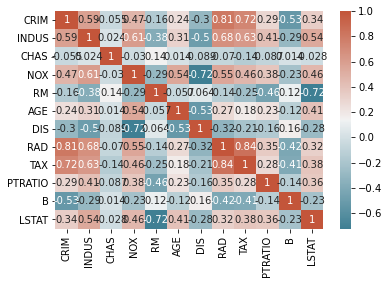

In [13]:
# calculate correlation matrix
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


Eens we een correlatie matrix hebben kunnen we verder kijken naar de relaties tussen de verschillende features.

<AxesSubplot:xlabel='LSTAT', ylabel='RM'>

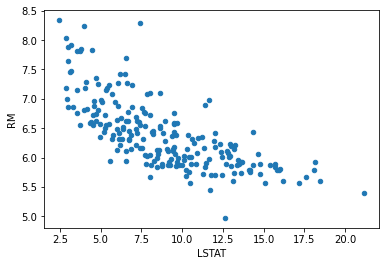

In [14]:
df.plot(kind='scatter', x='LSTAT', y='RM')

We kunnen als we niet teveel dimensies hebben via tooling ook alles visualiseren.

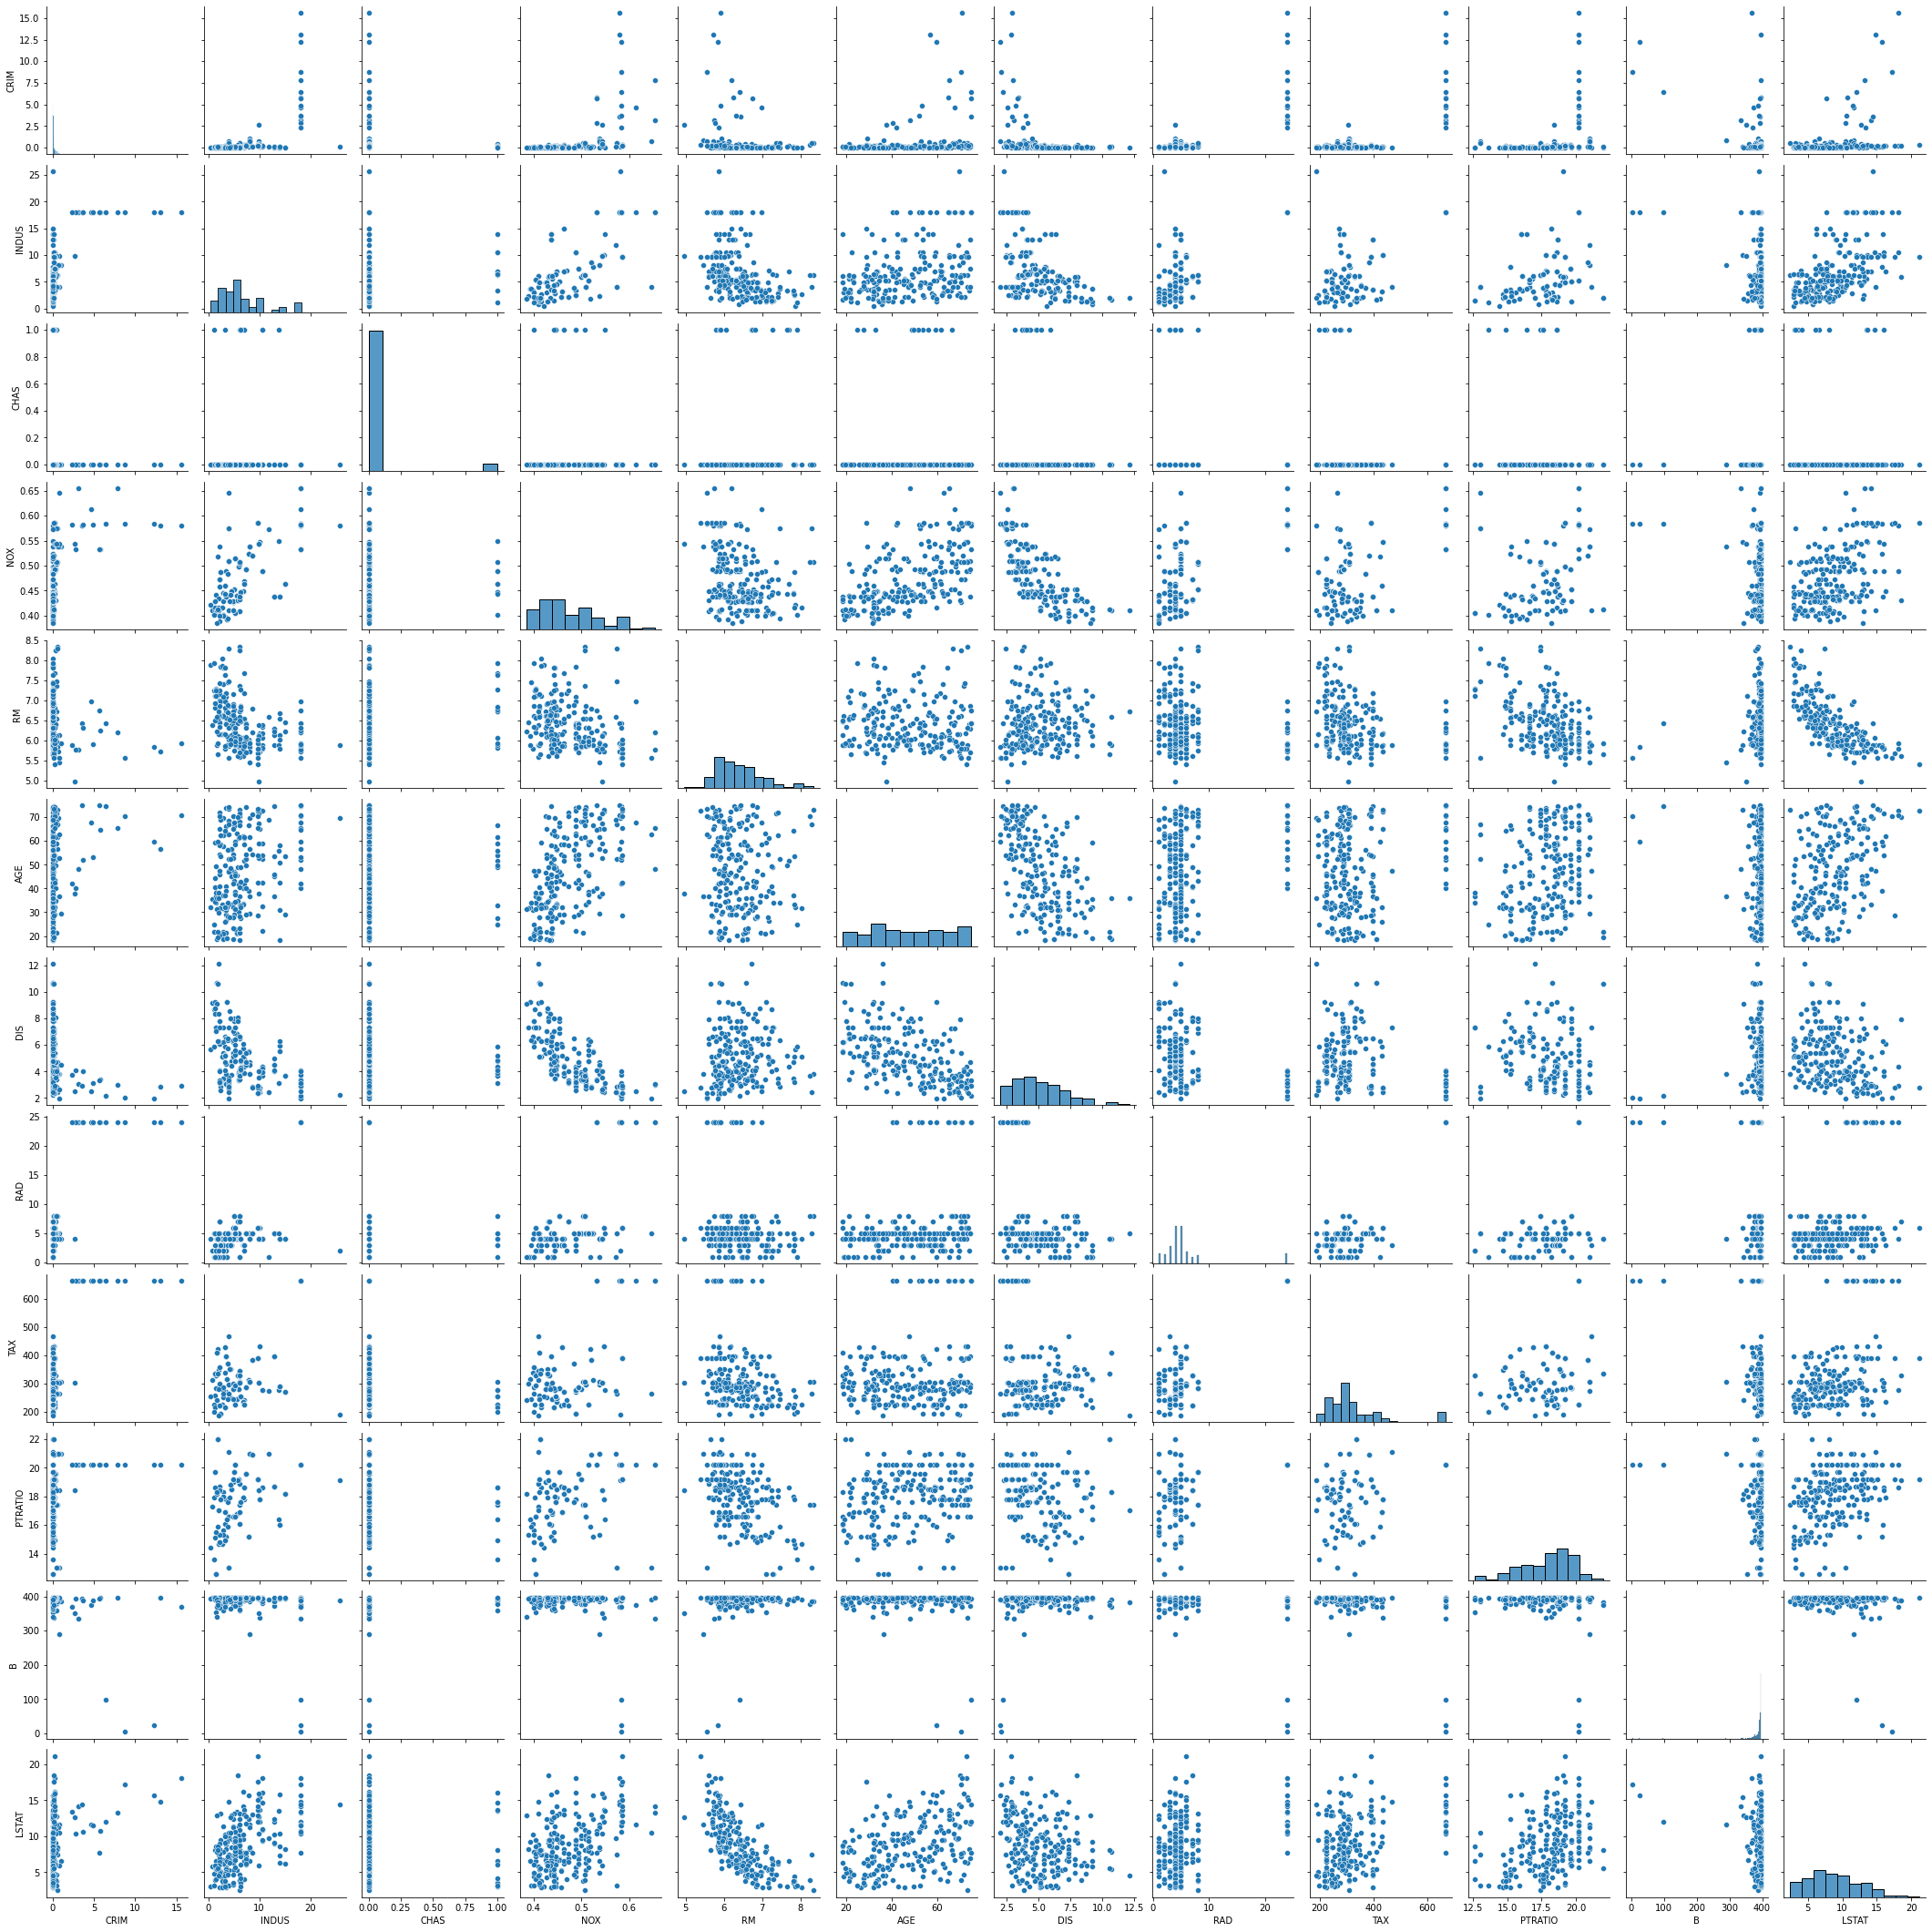

In [15]:
sns.pairplot(df)

Verder kunnen we ook nog naar de eigenschappen kijken van een feature op zichzelf

<AxesSubplot:ylabel='Frequency'>

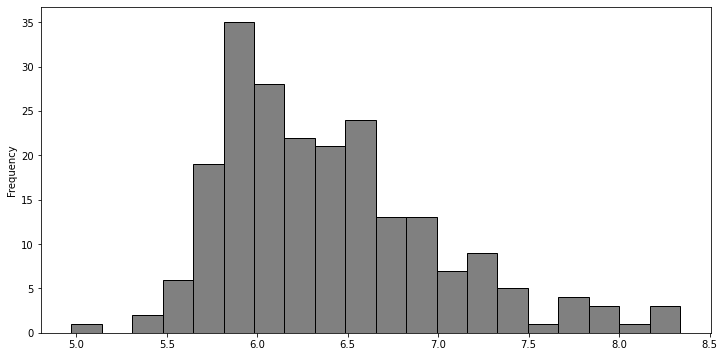

In [16]:
df['RM'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

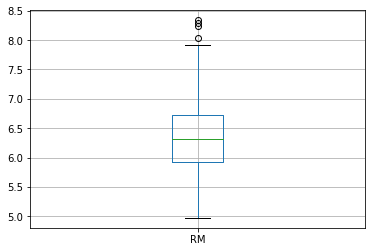

In [17]:
df.boxplot('RM')

## Low code

Er zijn ook verschillende low code libraries die het EDA werk vergemakkelen. We demonstreren hier de library pandas-profiling. 

In [18]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

# Read the Titanic Dataset
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
df = pd.read_csv(file_name)

profile = ProfileReport(
    df, title="Titanic Dataset", html={"style": {"full_width": True}}, sort=None
)

In [19]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]